###### This is an work that shows the algorithm to teach how use gaussians porcess to generate predicctions models, As example we use data of state of charge in batteries (data obtained fron NASA Data Repositories)

In [150]:
import sys
sys.path.insert(0, "/home/bill/pymc3/")
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
#import theano.tensor as tt
import scipy.io

In [5]:
B05 = scipy.io.loadmat("B0005.mat")
B06 = scipy.io.loadmat("B0006.mat")
B07 = scipy.io.loadmat("B0007.mat")
B018 = scipy.io.loadmat("B0018.mat")

In [6]:
Cycle =[]
Capacity = []
j=0
for i in range(len(B05["B0005"]["cycle"][0][0][0]["type"])):
    
    if B05["B0005"]["cycle"][0][0][0]["type"][i][0] == "discharge" :
                
        Capacity.append(B05["B0005"]["cycle"][0][0][0][i]["data"]["Capacity"][0][0][0][0])     
        j = j+1
        Cycle.append(j)
        

In [8]:
Number =[]
RCT = []
RE = []
j=0
for i in range(len(B05["B0005"]["cycle"][0][0][0]["type"])):
    
    if B05["B0005"]["cycle"][0][0][0]["type"][i][0] == "impedance" :
                
        RCT.append(B05["B0005"]["cycle"][0][0][0][i]["data"]["Rct"][0][0][0][0])    
        
        RE.append(B05["B0005"]["cycle"][0][0][0][i]["data"]["Re"][0][0][0][0]) 
        j = j+1
        Number.append(j)

In [9]:
IMP = {"NumCycle" : Number, "Rct_1" : RCT, "Re_1":RE}

In [10]:
df05_Imp=pd.DataFrame(IMP)

In [12]:
df05_Imp["Rct_1"] = df05_Imp["Rct_1"]/max(df05_Imp.Rct_1)

df05_Imp["Re_1"] = df05_Imp["Re_1"]/max(df05_Imp.Re_1)

# Discharge

In [23]:
dict_V_m = {}
dict_Time = {}
dict_Curr_m = {}
dict_Curr_l = {}
dict_V_l ={}
dict_Temp_m = {}

di = -1 
for i in range(len(B05["B0005"]["cycle"][0][0][0]["type"])):
    
    if B05["B0005"]["cycle"][0][0][0]["type"][i][0] == "discharge":
        di = di+1
        
        dict_V_m[di] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Voltage_measured"][0][0][0]
        dict_V_l[di] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Voltage_load"][0][0][0]
        
        dict_Time[di] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Time"][0][0][0]
        
        dict_Curr_m[di] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Current_measured"][0][0][0]
        
        dict_Curr_l[di] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Current_load"][0][0][0]
        
        dict_Temp_m[di] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Temperature_measured"][0][0][0]

## Creating Data Frame For Each List Of the Current Discharge Measured Dictionary 

In [73]:
Volt = {}
for i in range(len(dict_V_m)):
    Volt['df_V_%d'%i] = pd.DataFrame(dict_V_m[i])

In [74]:
dict_V_m_ch = {}
dict_Time_ch = {}

c_i = -1 
for i in range(len(B05["B0005"]["cycle"][0][0][0]["type"])):
    
    if B05["B0005"]["cycle"][0][0][0]["type"][i][0] == "charge":
        c_i = c_i+1
        
        dict_V_m_ch[c_i] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Voltage_measured"][0][0][0]
        
        dict_Time_ch[c_i] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Time"][0][0][0]
        
#print(dicts)

In [139]:
from matplotlib.pyplot import figure as fig

#### Voltage in the charge process

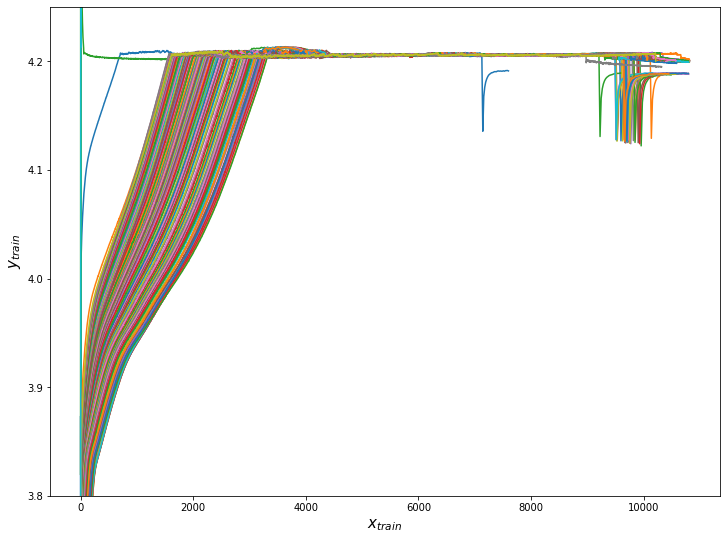

In [76]:

fig(num=None, figsize=(12, 9))
for i in range(len(dict_V_m_ch)):
    
        
    plt.plot(dict_Time_ch[i],dict_V_m_ch[i])    
        
plt.xlabel('$Time (hours)$',fontsize=15)
plt.ylabel('$Voltage (V)$',fontsize=15)
plt.ylim(3.8,4.25)
plt.show()  

In [36]:
ix = 0
dx = []
for k in range(len(dict_V_m[1])):
    
    ix = ix+1
    
    dx.append(ix)

#### Voltage in discharge process

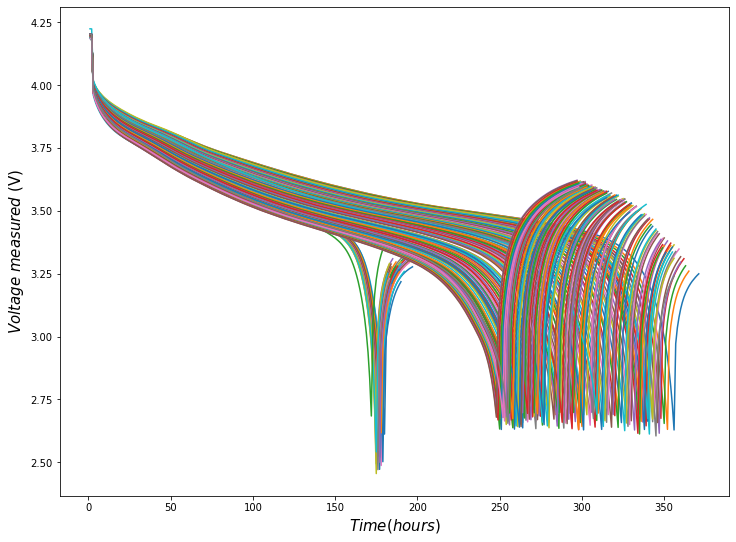

In [147]:
fig(num=None, figsize=(12, 9))
for i in range(len(dict_V_m)):
    A = []
    for j in range(len(dict_V_m[i])): 
        A.append(j+1)
    plt.plot(A,dict_V_m[i])    
plt.xlabel('$Time(hours)$',fontsize=15)
plt.ylabel('$Voltage$ $measured$ (V)',fontsize=15)
plt.show()        

#### Current in discharge process

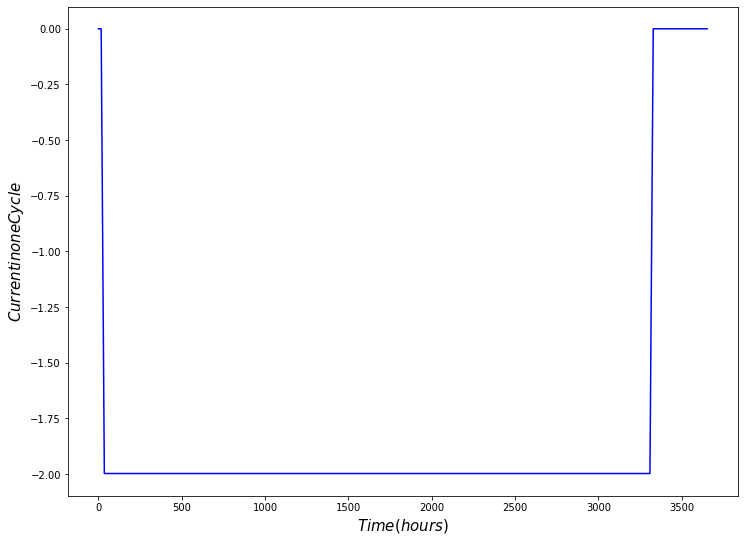

In [146]:
fig(num=None, figsize=(12, 9))
plt.plot(dict_Time[5],dict_Curr_l[5],"b")
plt.xlabel('$Time(hours)$',fontsize=15)
plt.ylabel('$Current in one Cycle$',fontsize=15)
plt.show() 

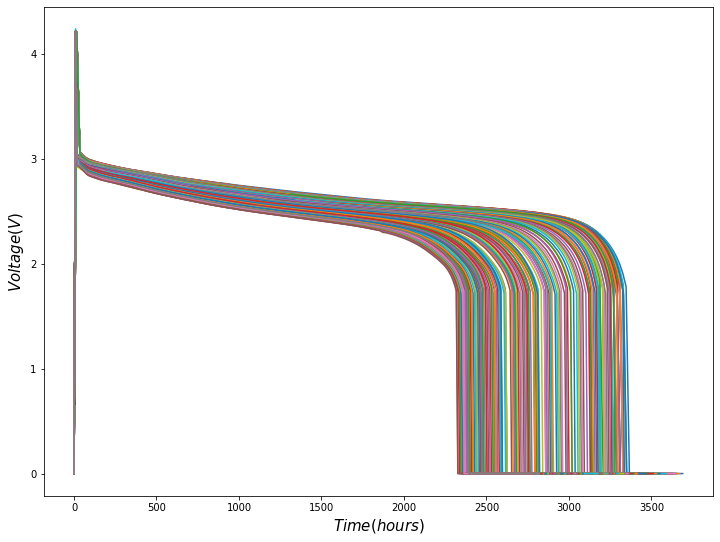

In [145]:
fig(num=None, figsize=(12, 9))
for i in range(len(dict_V_l)):
            
    plt.plot(dict_Time[i],dict_V_l[i]) 
            
plt.xlabel('$Time(hours)$',fontsize=15)
plt.ylabel('$Voltage (V)$',fontsize=15)
plt.show()       

#### Temperature in discharge process

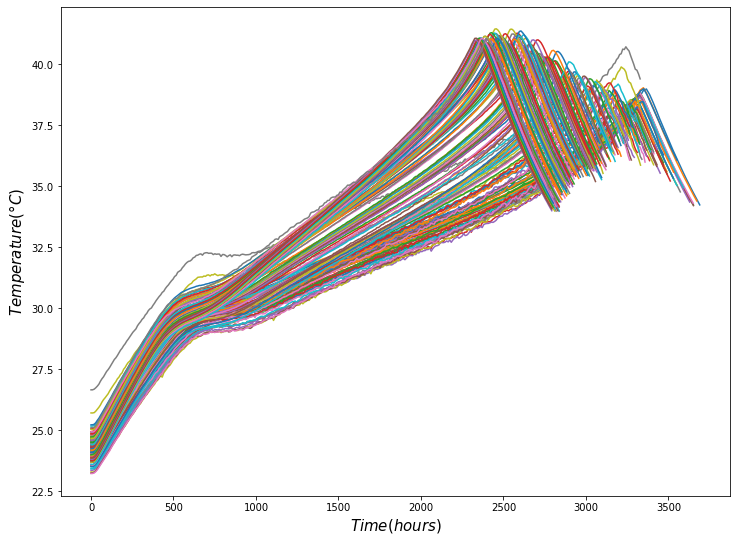

In [144]:
fig(num=None, figsize=(12, 9))
for i in range(len(dict_Temp_m)):
            
    plt.plot(dict_Time[i],dict_Temp_m[i]) 
            
plt.xlabel('$Time(hours)$',fontsize=15)
plt.ylabel('$Temperature (°C)$',fontsize=15)
plt.show()       

In [85]:
from scipy.integrate import simps
from numpy import trapz


#### Accumulated temperature per cycle

In [137]:
Area_temp = []

ci_t = []
for i in range(len(dict_Temp_m)):
    
    Area_temp.append(trapz(dict_Temp_m[i],dict_Time[i]))
    
    ci_t.append(i+1)

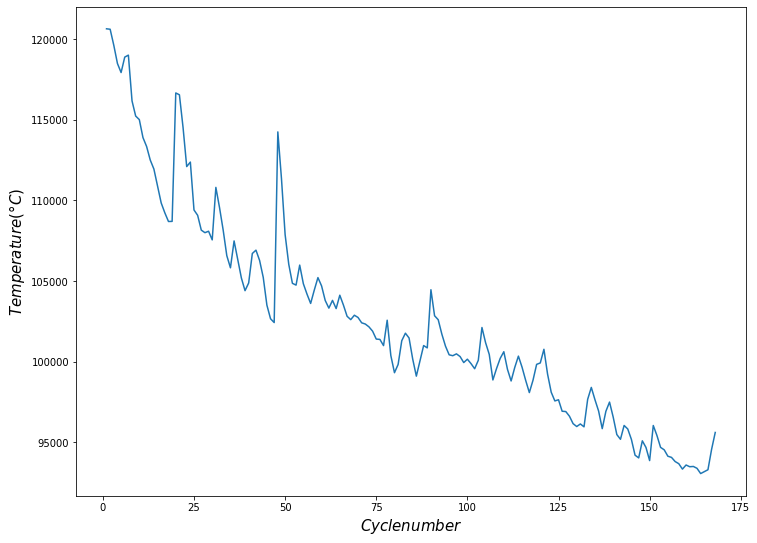

In [143]:
fig(num=None, figsize=(12, 9))            
plt.plot(ci_t,Area_temp)             
plt.xlabel('$Cycle number$',fontsize=15)
plt.ylabel('$Temperature (°C)$',fontsize=15)
plt.show()   

#### Accumulated Current per cycle

$i = \frac{dq}{dt}$

$q=\int i\,dt$

In [88]:
Area_Curr = []

ci_curr = []
for i in range(len(dict_Curr_m)):
    
    Area_Curr.append(trapz(dict_Curr_m[i],dict_Time[i]))
    
    ci_curr.append(i+1)

In [89]:

for i in range(len(Area_Curr)):
    Area_Curr[i] = -Area_Curr[i]


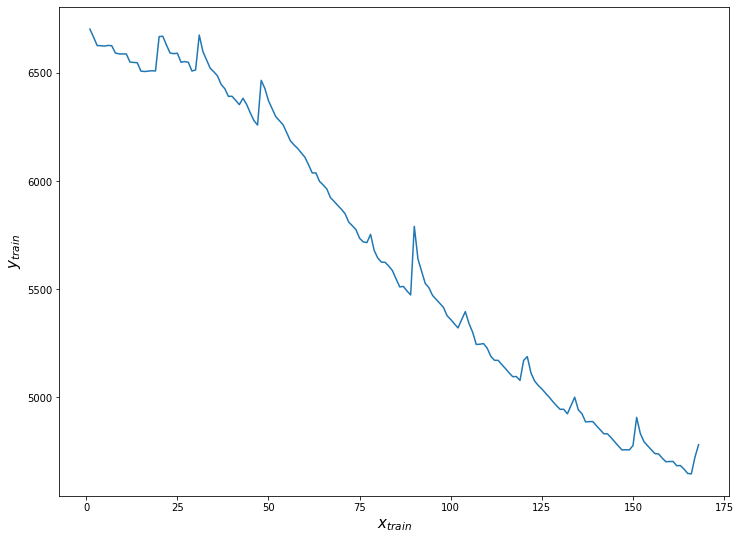

In [90]:
fig(num=None, figsize=(12, 9))            
plt.plot(ci_curr,Area_Curr)             
plt.xlabel('$x_{train}$',fontsize=15)
plt.ylabel('$y_{train}$',fontsize=15)
plt.show() 

#### Accumulated Voltage per cycle

In [94]:
Area_Vol_m = []
ci_Vol_m = []
for i in range(len(dict_V_m)):
    
    Area_Vol_m.append(trapz(dict_V_m[i],dict_Time[i]))
    
    ci_Vol_m.append(i+1)

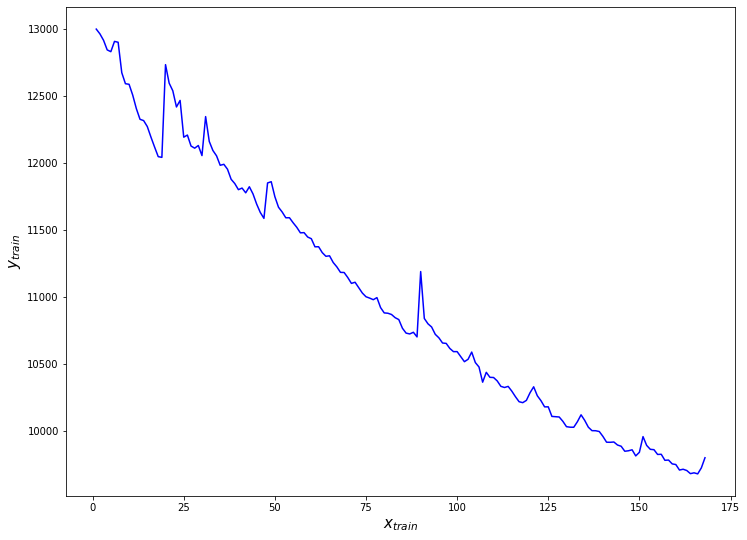

In [95]:
fig(num=None, figsize=(12, 9))            
plt.plot(ci_Vol_m,Area_Vol_m,"b")             
plt.xlabel('$x_{train}$',fontsize=15)
plt.ylabel('$y_{train}$',fontsize=15)
plt.show() 

# Impedance Study

In [96]:
dict_Impedance_m = {}
count = []

di = -1 
for i in range(len(B05["B0005"]["cycle"][0][0][0]["type"])):
    
    if B05["B0005"]["cycle"][0][0][0]["type"][i][0] == "impedance":
        di = di+1
        count.append(di+2)
        dict_Impedance_m[di] = abs(B05["B0005"]["cycle"][0][0][0][i]["data"]["Battery_impedance"][0][0])
        

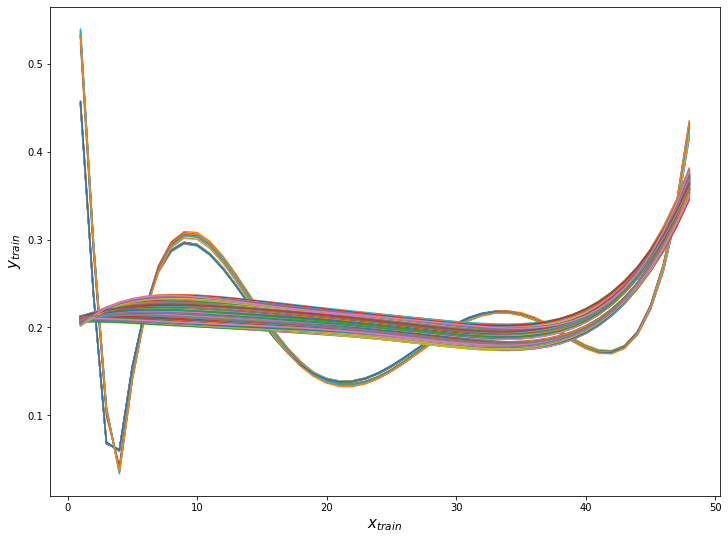

In [0]:
fig(num=None, figsize=(12, 9))            
#plt.plot(c_48,dict_Impedance_m[7],"b")

for i in range(len(dict_Impedance_m)):
    A=[]
    
    for j in range(len(dict_Impedance_m[i])):
        
        A.append(j+1)
     
    plt.plot(A,dict_Impedance_m[i])
plt.xlabel('$x_{train}$',fontsize=15)
plt.ylabel('$y_{train}$',fontsize=15)
plt.show() 

#### Accumulated Impedance per cycle

In [99]:
Area_Imp = []

ci_Imp = []
for i in range(len(dict_Impedance_m)):
    
    B=[]
    for j in range(len(dict_Impedance_m[i])):
        
        B.append(j+1)
    Area_Imp.append(trapz(dict_Impedance_m[i].flatten(),B))
    
    ci_Imp.append(i+1)

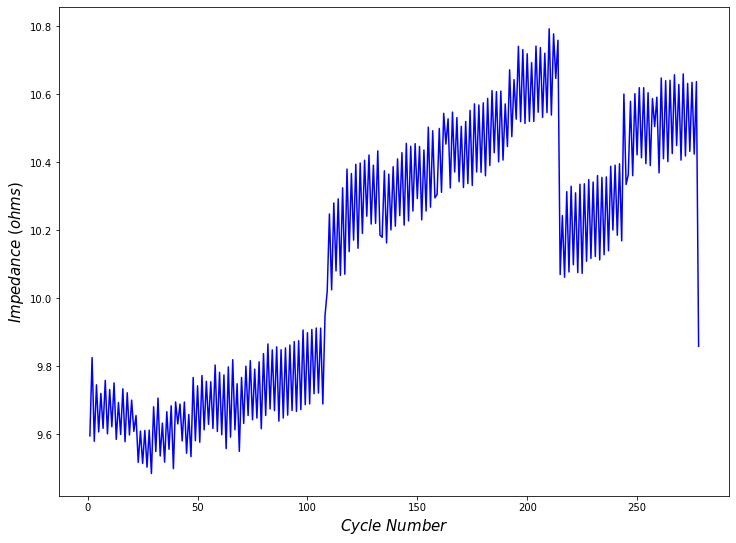

In [149]:
fig(num=None, figsize=(12, 9))            
plt.plot(ci_Imp,Area_Imp,"b")             
plt.xlabel('$Cycle$ $Number$',fontsize=15)
plt.ylabel('$Impedance$ $(ohms)$',fontsize=15)
plt.show()

#### We can create a data frame with Cycle number and capacity

In [102]:
Cycle=[]
for i in range(len(Area_Curr)):
    Cycle.append(i+1)
Capacity = Area_Curr

In [103]:
B005 = {"Cycle" : Cycle, "Capacity" : Capacity}
df05 = pd.DataFrame(B005)

In [105]:
df05["Capacity"] = df05["Capacity"]/max(df05.Capacity)

## Hyperparameter priors

###### Now we are going to use gaussian porcess to generate prediction models with different kernels like: Matern 3/2, Matern 5/2, Matern 3/2 + Matern 5/2 and periodic kernel, same way do in the papaer "Gaussian process regression for forecasting battery state of health" - Robert R. Richardson, Michael A. Osborne, David A. Howey (2017)

ℓ_pdecay: The periodic decay. The smaller this parameter is, the faster the periodicity goes away. 

l_psmooth: The smoothness of the periodic component. It controls how “sinusoidal” the periodicity is. The plot of the data shows that seasonality is not an exact sine wave.

period: The period. The period that is centered at one. 

l_med: This is the lengthscale for the short to medium long variations. This prior has most of its mass below 6 years.
α: This is the shape parameter. This prior is centered at 3, since we’re expecting there to be some more variation than could be explained by an exponentiated quadratic.

ℓ_trend: The lengthscale of the long term trend. It has a wide prior with mass on a decade scale. Most of the mass is between 10 to 60 years.

ℓ_noise: The lengthscale of the noise covariance. This noise should be very rapid, in the scale of several months to at most a year or two.

l_med:
 l_pdecay:
 n_med:
 n_per:
 sigma:

In [128]:
df05 = pd.read_csv('DFrame05.txt',header = 0, delim_whitespace = True)
Recols = ["Cycle", "Capacity"]
df05.columns = Recols
df05 = df05[Recols]

In [129]:
y_0 = df05["Capacity"].values
first_Capacity = y_0[0]
std_Capacity = np.std(y_0)
y_n = (y_0 - first_Capacity) / std_Capacity

In [130]:
def dates_to_idx(timelist):
    t = (timelist)
    return np.asarray(t)

In [131]:
nd = 100
data_prior = df05.iloc[:nd, :]
data_after = df05.iloc[nd:, :]


Predicting with gp ...
Predicting with gp_medium ...
Predicting with gp_seasonal ...
Predicting with gp_trend ...
Done


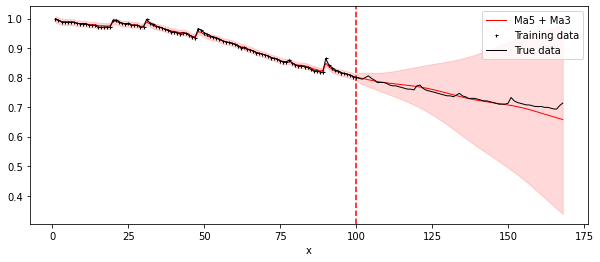

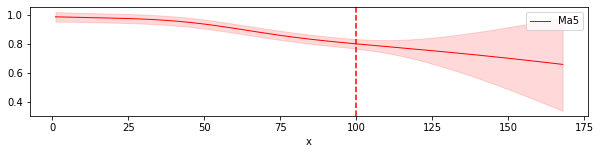

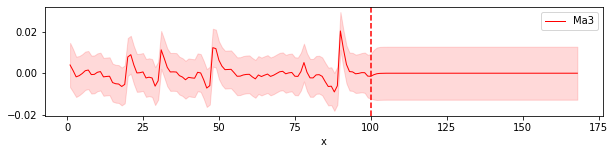

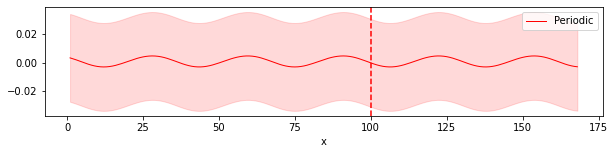

In [135]:
# Creating an empty dict 
myDict = dict() 
  
# Creating a list 

  
# Iterating the elements in list 

ni = len(df05["Cycle"])
D_p_1=[68]
Nl = [ni]*len(D_p_1)
D_P = [i-j for i,j in zip(Nl,D_p_1)]
MSE = list(range(len(D_P)))
for i in range(len(D_P)):
    df_prior = df05.iloc[:D_P[i], :]
    df_after = df05.iloc[D_P[i]:, :] 
    t = df_prior["Cycle"].values[:,None]
    y = df_prior["Capacity"].values
    t_predict = df05["Cycle"].values[:,None]
    y_test = df05["Capacity"].values 
    
    with pm.Model() as model:
        # yearly periodic component x long term trend
        n_per = pm.HalfCauchy("n_per", beta=2, testval=1.0)
        l_pdecay = pm.Gamma("l_pdecay", alpha=10, beta=0.075)
        #period  = pm.Normal("period", mu=1, sd=0.05)
        #l_psmooth = pm.Gamma("l_psmooth ", alpha=4, beta=3)
        cov_seasonal = n_per**2 * pm.gp.cov.Matern52(1, l_pdecay)
        gp_seasonal = pm.gp.Marginal(cov_func=cov_seasonal)

        # small/medium term irregularities
        n_med = pm.HalfCauchy("n_med", beta=0.5, testval=0.1)
        l_med = pm.Gamma("l_med", alpha=2, beta=0.75)
        #alfa = pm.Gamma("alfa", alpha=5, beta=2) 
        cov_medium = n_med**2 * pm.gp.cov.Matern32(1, l_med)
        gp_medium = pm.gp.Marginal(cov_func=cov_medium)

        # long term trend
        n_trend = pm.HalfCauchy("n_trend", beta=2, testval=2.0)
        #period_Trend  = pm.Normal("period", mu=1, sd=0.05)
        period_Trend  = pm.Normal("period", mu=2, sd= 4)
        l_trend = pm.Gamma("l_trend", alpha=4, beta=0.1)
        cov_trend = n_trend**2* pm.gp.cov.Periodic(1, l_trend, period_Trend)

        # positive trend
        gp_trend = pm.gp.Marginal(cov_func=cov_trend) 

        # noise model
        n_noise = pm.HalfNormal("n_noise", sd=0.5, testval=0.05)
        l_noise = pm.Gamma("l_noise", alpha=2, beta=0.4)
        sigma = pm.HalfNormal("sigma",  sd=0.25, testval=0.05)
        cov_noise = n_noise**2 * pm.gp.cov.Matern52(1, l_noise) +\
                    pm.gp.cov.WhiteNoise(sigma)

        #gp_noise = pm.gp.Marginal(cov_func=cov_noise)  

        gp = gp_seasonal + gp_medium + gp_trend

        y_ = gp.marginal_likelihood("y", X=t, y=y, noise=cov_noise)
        mp = pm.find_MAP()
        
        #Aditive descomposition        
        
        ##############################################################
        Cycle_num = df05["Cycle"].values
        #tnew = to_idx(dt)[:,None]
        tnew = df05["Cycle"].values[:,None]
        
        y_true = df05["Capacity"].values
        #tnew = to_idx(dt)[:,None]
        t_true = df05["Cycle"].values[:,None]
        
        ##############################################################
        
        print("Predicting with gp ...")
        mu_t, var = gp.predict(tnew, point=mp, diag=True)
        
        # make dataframe to store fit results
        fit = pd.DataFrame({"t": tnew.flatten(),
                            "mu_total": mu_t,
                            "sd_total": np.sqrt(var)},
                           index=Cycle_num)
    
        print("Predicting with gp_medium ...")
        mu_med, var_med = gp_medium.predict(tnew, point=mp,
                                    given={"gp": gp, "X": t, "y": y, "noise": cov_noise},
                                    diag=True)
        fit = fit.assign(mu_medium = mu_med,
                         sd_medium = np.sqrt(var_med))

        print("Predicting with gp_seasonal ...")
        mu_seas, var_seas = gp_seasonal.predict(tnew, point=mp,
                                      given={"gp": gp, "X": t, "y": y, "noise": cov_noise},
                                      diag=True)
        fit = fit.assign(mu_seasonal = mu_seas,
                         sd_seasonal = np.sqrt(var_seas))
        
        print("Predicting with gp_trend ...")
        mu_trend, var_trend = gp_trend.predict(tnew, point=mp,
                                      given={"gp": gp, "X": t, "y": y, "noise": cov_noise},
                                      diag=True)
        fit = fit.assign(mu_trend = mu_trend,
                         sd_trend = np.sqrt(var_trend))
        
        print("Done")
             
        fig = plt.figure(figsize=(10,4))
        
        ax = fig.gca()

        plt.plot(fit.t.values[:,None], fit.mu_total.values, 'r', lw=1,
                 label="Ma5 + Ma3")
        
        plt.fill_between(fit.t.values, fit.mu_total.values - 2*fit.sd_total.values, 
                         fit.mu_total.values + 2*fit.sd_total.values, color="r", alpha=0.15)
        
        plt.axvline(x=D_P[i], color = "r", ls = "--")
        
        # plot original data and true function
        
        plt.plot(t, y, '+k', ms=3, alpha=1.0, label="Training data")
        plt.plot(t_true, y_true, "k", lw=1, label="True data")
        
        plt.xlabel("x") 
        
        plt.legend()
        
        fig = plt.figure(figsize=(10,2))
        ax = fig.gca()
        plt.plot(fit.t.values[:,None], fit.mu_seasonal.values, 'r', lw=1,
                 label="Ma5")
        plt.fill_between(fit.t.values, fit.mu_seasonal.values - 2*fit.sd_seasonal.values, 
                         fit.mu_seasonal.values + 2*fit.sd_seasonal.values, color="r", alpha=0.15)
        plt.axvline(x=D_P[i], color = "r", ls = "--")
        
        plt.xlabel("x") 
        plt.legend()
        
        fig = plt.figure(figsize=(10,2))
        
        ax = fig.gca()

        plt.plot(fit.t.values[:,None], fit.mu_medium.values, 'r', lw=1,
                 label="Ma3")
        
        plt.fill_between(fit.t.values, fit.mu_medium.values - 2*fit.sd_medium.values, 
                         fit.mu_medium.values + 2*fit.sd_medium.values, color="r", alpha=0.15)
        
        plt.axvline(x=D_P[i], color = "r", ls = "--")
        
        # plot original data and true function
        plt.xlabel("x") 
        plt.legend()
        fig = plt.figure(figsize=(10,2))
        ax = fig.gca()
        plt.plot(fit.t.values[:,None], fit.mu_trend.values, 'r', lw=1,
                 label="Periodic")
        plt.fill_between(fit.t.values, fit.mu_trend.values - 2*fit.sd_trend.values, 
                         fit.mu_trend.values + 2*fit.sd_trend.values, color="r", alpha=0.15)
        plt.axvline(x=D_P[i], color = "r", ls = "--")
        # plot original data and true function
        plt.xlabel("x") 
        plt.legend()

###### Prediction for different horizonts

logp = 152.63, ||grad|| = 0.0019241: 100%|██████████| 82/82 [00:00<00:00, 365.27it/s]  


Sampling gp predictions ...


logp = 271.98, ||grad|| = 1.709: 100%|██████████| 103/103 [00:01<00:00, 71.27it/s] 


Sampling gp predictions ...


logp = 481.91, ||grad|| = 0.0052144: 100%|██████████| 84/84 [00:01<00:00, 64.64it/s]  


Sampling gp predictions ...


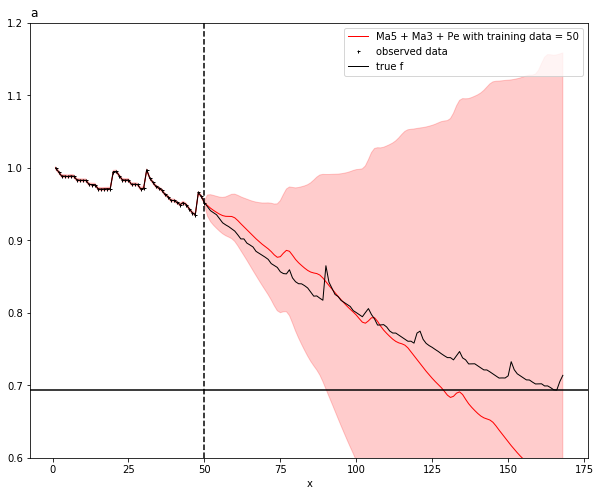

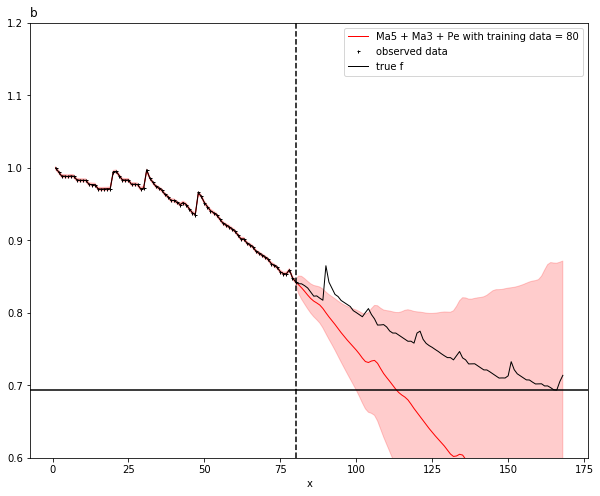

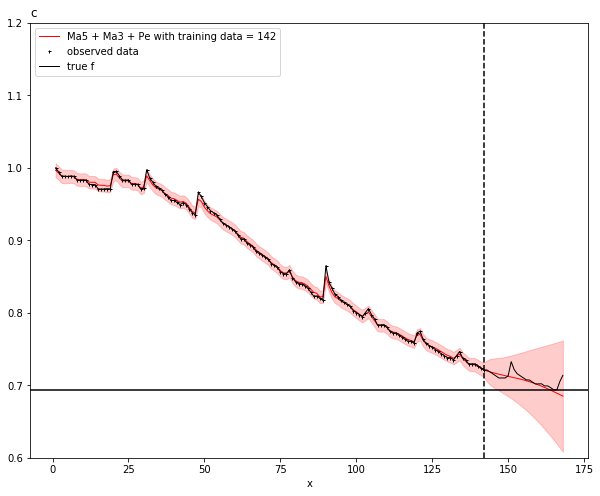

In [0]:
# Creating an empty dict 
myDict = dict() 
  
# Creating a list 

  
# Iterating the elements in list 

ni = len(df05["Cycle"])

D_p_1=[118,88,26]
lab = ["a", "b","c","d"]
#D_p_1 = list(range(5,80,6))
#ni = len(df05["Cycle"])


Nl = [ni]*len(D_p_1)
D_P = [i-j for i,j in zip(Nl,D_p_1)]


MSE = list(range(len(D_P)))
for i in range(len(D_P)):
    
    df_prior = df05.iloc[:D_P[i], :]
    #df_A_train = df05.iloc[:D_P[3], :]
    df_after = df05
    t = df_prior["Cycle"].values[:,None]
    y = df_prior["Capacity"].values
    
    t_predict = df_after["Cycle"].values[:,None]
    y_test = df_after["Capacity"].values 
    
    t_true = df05["Cycle"].values[:,None]
    y_true = df05["Capacity"].values
    
    with pm.Model() as model:
        # yearly periodic component x long term trend
        n_per = pm.HalfCauchy("n_per", beta=2, testval=1.0)
        l_pdecay = pm.Gamma("l_pdecay", alpha=10, beta=0.075)
        #period  = pm.Normal("period", mu=1, sd=0.05)
        #l_psmooth = pm.Gamma("l_psmooth ", alpha=4, beta=3)
        cov_seasonal = n_per**2 * pm.gp.cov.Matern52(1, l_pdecay)
        gp_seasonal = pm.gp.Marginal(cov_func=cov_seasonal)

        # small/medium term irregularities
        n_med = pm.HalfCauchy("n_med", beta=0.5, testval=0.1)
        l_med = pm.Gamma("l_med", alpha=2, beta=0.75)
        #alfa = pm.Gamma("alfa", alpha=5, beta=2) 
        cov_medium = n_med**2 * pm.gp.cov.Matern32(1, l_med)
        gp_medium = pm.gp.Marginal(cov_func=cov_medium)

        # long term trend
        n_trend = pm.HalfCauchy("n_trend", beta=2, testval=2.0)
        #period_Trend  = pm.Normal("period", mu=1, sd=0.05)
        period_Trend  = pm.Normal("period", mu=2, sd= 4)
        l_trend = pm.Gamma("l_trend", alpha=4, beta=0.1)
        cov_trend = n_trend**2* pm.gp.cov.Periodic(1, l_trend, period_Trend)

        # positive trend
        gp_trend = pm.gp.Marginal(cov_func=cov_trend) 


        # noise model
        n_noise = pm.HalfNormal("n_noise", sd=0.5, testval=0.05)
        l_noise = pm.Gamma("l_noise", alpha=2, beta=0.4)
        sigma = pm.HalfNormal("sigma",  sd=0.25, testval=0.05)
        cov_noise = n_noise**2 * pm.gp.cov.Matern52(1, l_noise) +\
                    pm.gp.cov.WhiteNoise(sigma)


        #gp_noise = pm.gp.Marginal(cov_func=cov_noise)  

        gp = gp_seasonal + gp_medium + gp_trend

        y_ = gp.marginal_likelihood("y", X=t, y=y, noise=cov_noise)
        mp = pm.find_MAP()
    
        
        #Aditive descomposition
        
        
        
        
        Cycle_num = df_after["Cycle"].values
        #tnew = to_idx(dt)[:,None]
        t_new = df_after["Cycle"].values[:,None]
        
        
        
        # total fit
        
        #scaler.fit_transform(df)
        
        
        print("Sampling gp predictions ...")
        mu_pred, cov_pred = gp.predict(t_new, point=mp, diag =True)
      
        
        
        sd = np.sqrt(cov_pred)

        # draw plot
        fig = plt.figure(figsize=(10,8)) 
        ax = fig.gca()

        # plot mean and 2σ intervals
        plt.plot(t_new, mu_pred, 'r', lw=1, label="Ma5 + Ma3 + Pe with training data = %d"% D_P[i]);
        #plt.plot(t_new, mu_pred + 2*sd, 'r', lw=1); 
        #plt.plot(t_new, mu_pred - 2*sd, 'r', lw=1);
        plt.fill_between(df_after.Cycle.values, mu_pred - 2*sd, mu_pred + 2*sd, color="r", alpha=0.2)
        
        plt.axhline(y=min(df05["Capacity"].values), color = "black")
        plt.axvline(x=D_P[i], color = "black", ls = "--")
        # plot original data and true function
        plt.plot(t, y, '+k', ms=3, alpha=1.0, label="observed data");
        plt.plot(t_true, y_true, "black", lw=1, label="true f");

        plt.xlabel("x"); plt.ylim([0.6,1.2]);
        plt.title(lab[i],loc="left"); 
        plt.legend()
        